# 타이타닉 데이터 EDA

## EDA란?
Exploratory data analysis(탐색적 데이터 분석)으로 주어진 데이터를 다양한 방법으로 정보를 찾아내는 데이터 분석 방법  
모델링 이전 데이터를 확인하고 흟어보면서 데이터에 대한 이해를 목적으로 시행되며 이를 바탕으로 정교한 모델링을 수행 할 수 있다.

- 목표 : 설명 변수와 종속 변수의 관계를 한 줄로 정의할 수 있어야 함(목표 = 문제 정의)  
- 시각화 이유 : 테이블 데이터를 사람들이 해석할 필요없이 직관적으로 볼 수 있게 함 + 데이터의 특이점과 분포를 확인  
- 수집한 데이터에 스토리를 만들 수 있어야 함  
- titanic dataset : 결측치가 있어 전처리 필요


## titanic 데이터 설명
타이타닉호에 승선했던 탑승자 정보를 담고 있는 데이터이다. 데이터분석 필드에서는 교육용 및 입문용 데이터로 오랫동안 사랑받아 온 데이터이며  
탑승자 정보를 바탕으로 이 탑승자가 생존했는지 혹은 사망했는지 분류하는 모델링을 목적으로 제작 된 데이터입니다. 
- titanic real dataset : 애초에 모델링을 하기 위해 수집된 데이터셋(목적이 정해져 있는 데이터셋)
- survived에 영향을 주는 설명변수를 찾아야 함 -> 설명변수를 찾았다면, 인사이트를 주고 분포를 설명할 수 있어야 함

**columns 정보**
- pclass : 객실 등급
- survived : 생존 유무
- name : 칭호를 포함한 이름
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- ticket : 탑승권 종류 (각 숫자가 의미하는 바는 데이터를 통해 알 수 있는 것이 없을 수 있습니다.)
- fare : 지불한 운임
- cabin : 객실정보
- embarked : 선착장정보
- boat : 탈출한 보트가 있다면 boat 번호
- body : 사망자의 시신 수습 후 부여한 일련번호
- home : 출신

## EDA 진행 예시

### 타이타닉 탑승자 데이터 불러오기

In [2]:
# 필요모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# 데이터 로딩 및 확인
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
# 데이터 종류 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


각 작업을 거친 후 데이터에 대한 리포트 혹은 시각화를 통해 얻을 수 있는 정보를 기술 해봅니다.  
위의 정보를 바탕으로 1309개의 샘플이 존재하지만 몇몇 개의 컬럼에는 결측치(비어있는 값)이 있음을 확인 할 수 있습니다

In [4]:
# 기초통계량 확인
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


전체 탑승객의 생존률, 평균 연령 정도가 우리가 확인하고 추후 생각해보아야 할 데이터 같습니다.

## 1. Null Data Check

In [5]:
for col in df:
    msg = 'column: {:>10}\t Percent of NaN value : {:.2f}%'.format(col, 100*(df[col].isnull().sum() / df[col].shape[0]))
    print(msg)    

column:     pclass	 Percent of NaN value : 0.00%
column:   survived	 Percent of NaN value : 0.00%
column:       name	 Percent of NaN value : 0.00%
column:        sex	 Percent of NaN value : 0.00%
column:        age	 Percent of NaN value : 20.09%
column:      sibsp	 Percent of NaN value : 0.00%
column:      parch	 Percent of NaN value : 0.00%
column:     ticket	 Percent of NaN value : 0.00%
column:       fare	 Percent of NaN value : 0.08%
column:      cabin	 Percent of NaN value : 77.46%
column:   embarked	 Percent of NaN value : 0.15%
column:       boat	 Percent of NaN value : 62.87%
column:       body	 Percent of NaN value : 90.76%
column:  home.dest	 Percent of NaN value : 43.09%


## 2. 샘플링으로 데이터 살펴보기
판다스 수업시간에 진행했던 팬시 인덱싱을 사용하여 다양한 가정을 통한 데이터를 살펴보겠습니다.  
전체 탑승객의 생존률은 38% 정도였지만 1등급 객실에 승선한 여성의 경우의 생존률을 알아보겠습니다.

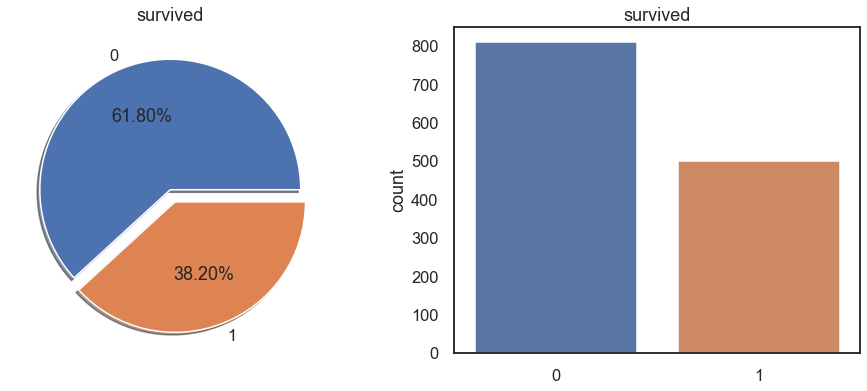

In [71]:
# 전체 생존률 확인
f, ax = plt.subplots(1, 2, figsize=(16,6))
df['survived'].value_counts().plot.pie(explode=[0 ,0.1], autopct='%1.2f%%', ax = ax[0], shadow = True)
ax[0].set_title('survived')
ax[0].set_ylabel('')
sns.countplot('survived', data=df, ax=ax[1])
ax[1].set_title('survived')
ax[1].set_xlabel('')
plt.show()

In [7]:
df[(df['pclass']==1) & (df['sex']=='female') & (df['survived']==1)]['survived'].value_counts()

1    139
Name: survived, dtype: int64

In [8]:
# 조건에 맞는 데이터 샘플링 645명, 생존자 400명
# floating 해보고, pclass와 sex column이 survived에 영향을 미치는지 확인
df[(df['pclass'] == 1) & (df['sex'] =='female')]['survived'].sum()

139

In [9]:
# 단순계산 : 1등급 좌석에 탑승한 여성의 생존율
(139 / 1309) * 100

10.618792971734148

## 3. 히트맵으로 전체 features간 상관관계 확인하기

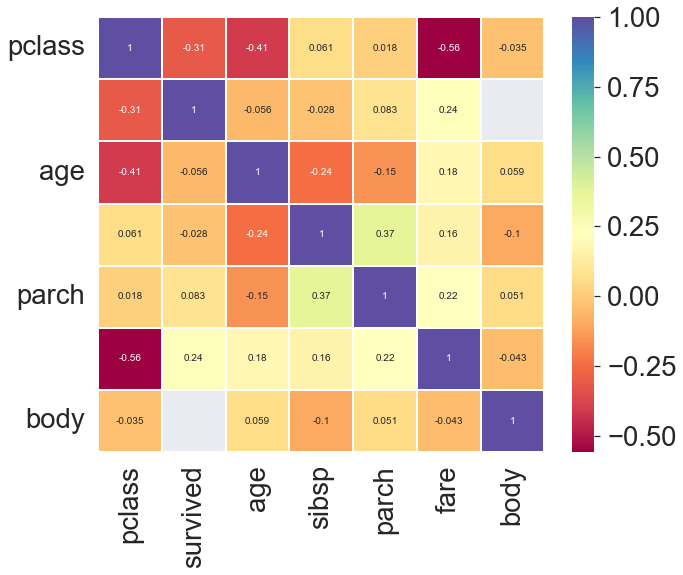

In [10]:
# 상관계수를 보면, 상관관계가 높은 feature가 없다.
# 따라서, 모든 feature에 대해 feature engineering과 전처리 과정 필요
# 단, 의미가 중복되는 column 또는 'body' column은 삭제해도 무방

sns.heatmap(df.corr(), annot=True, cmap = 'Spectral', linewidth=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

<AxesSubplot:xlabel='pclass', ylabel='fare'>

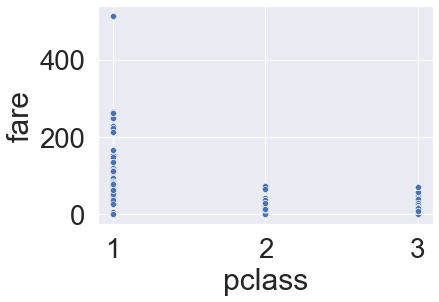

In [11]:
# 상관계수가 -0.56으로 가장 높은 pcalss와 fare column 사이에도 상관관계 없음
sns.scatterplot(data=df, x="pclass", y="fare")

# 4. feature 분석하기

1. sex - categorical feature

In [12]:
df.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0           127
        1           339
male    0           682
        1           161
Name: survived, dtype: int64

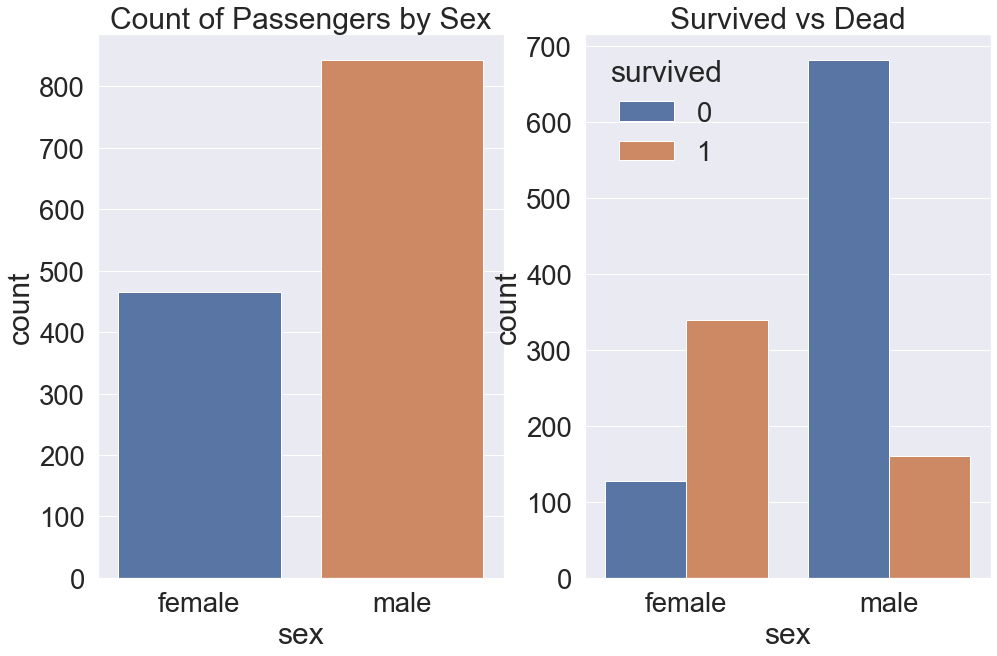

In [13]:
# 성별에 따른 생존자 수
fig = plt.figure(figsize=(16,10))
graph1 = fig.add_subplot(1,2,1)
graph2 = fig.add_subplot(1,2,2)

sns.countplot('sex',data=df, ax=graph1)
graph1.set_title('Count of Passengers by Sex')

sns.countplot('sex',hue='survived',data=df, ax=graph2)
graph2.set_title('Survived vs Dead')
plt.show()

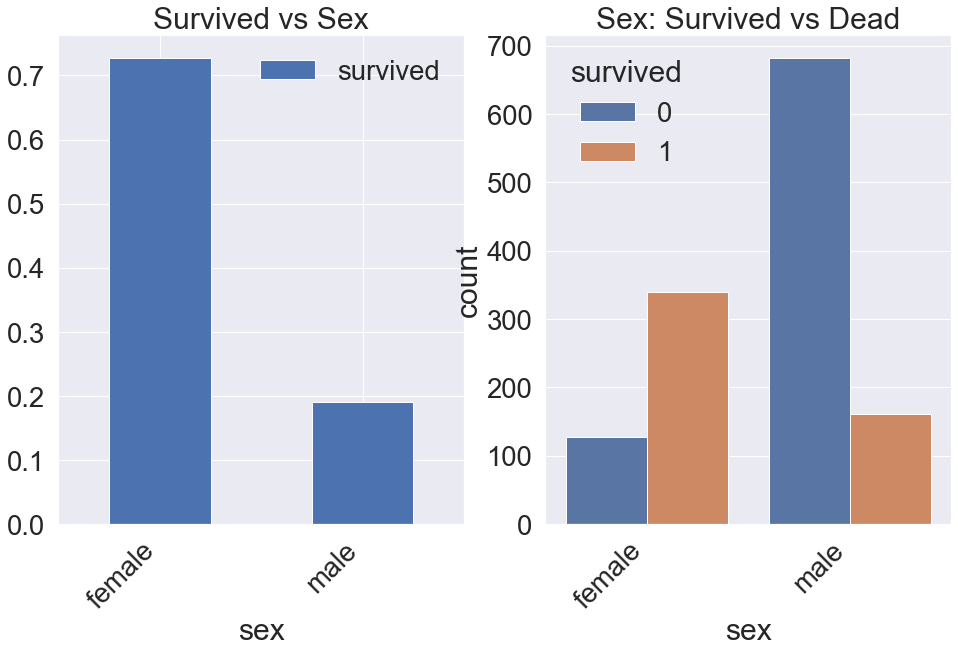

In [14]:
# 성별에 따른 생존률
# 남자 승객이 약 2배 더 많이 탑승했음에도 생존률은 여성(약 75%)이 남성(약 18%)보다 높디
# 따라서, 성별은 모델링에 있어 매우 중요한 feature

f, ax = plt.subplots(1, 2, figsize = (16, 10))
df[['sex', 'survived']].groupby(['sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
f.autofmt_xdate(rotation=45)
sns.countplot('sex', hue='survived', data=df, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

2. Pclass - ordinal feature

In [15]:
pd.crosstab(df.pclass, df.survived, margins=True).style.background_gradient(cmap='Wistia')

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


In [16]:
df.groupby(['pclass'])['survived'].mean()

pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64

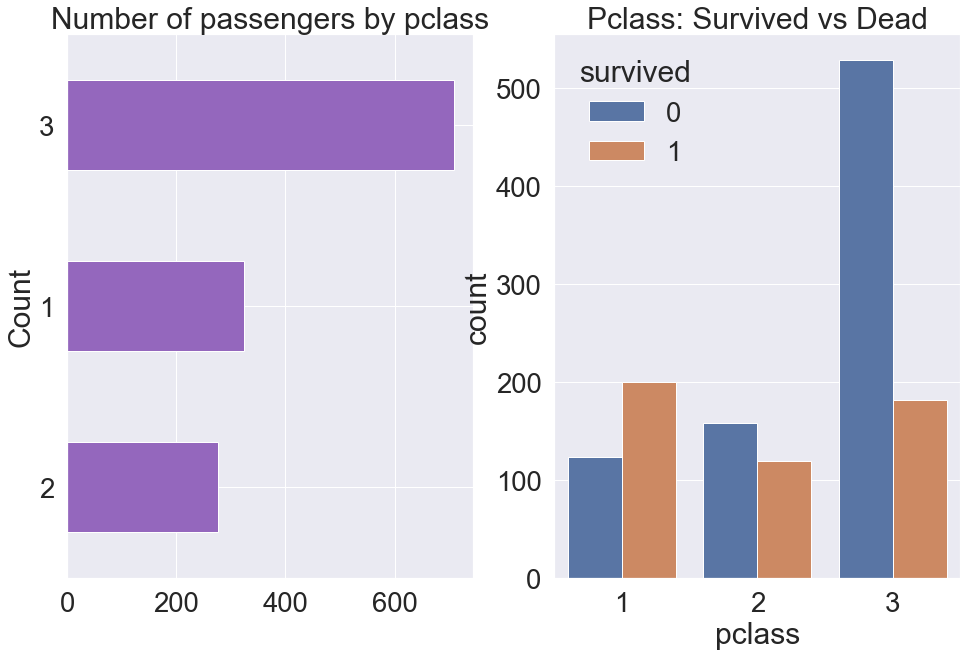

In [17]:
# Pclass 3에 탑승한 승객이 훨씬 많지만
# Pclass 1에 탑승한 승객의 약 2/3가 생존한 것에 반해,
# Pcalss 3에 탑승한 승객은 약 25%만 생존했다.

f, ax = plt.subplots(1, 2, figsize = (16, 10))

df['pclass'].value_counts().plot.barh(color='#9467bd', ax=ax[0])
ax[0].set_title('Number of passengers by pclass')
ax[0].set_ylabel('Count')
ax[0].invert_yaxis()


sns.countplot('pclass', hue='survived', data=df, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()



In [18]:
# sex & pclass vs survived
pd.crosstab([df.sex, df.survived], df.pclass, margins=True).style.background_gradient(cmap='summer_r')

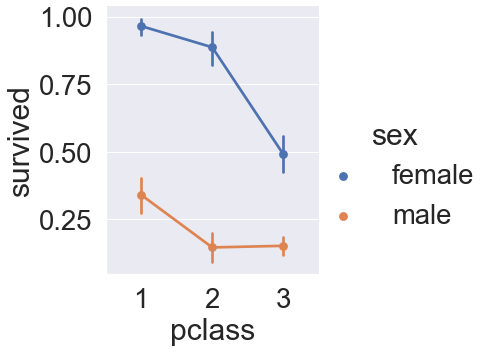

In [19]:
sns.factorplot('pclass', 'survived', hue='sex', data=df)
plt.show()

1) pclass 1에 탑승한 여성의 생존율은 96%이며, 94명 중 사망자는 단 3명이다.   
2) pclass 1에 탑승한 남성의 생존율은 낮다는 점으로 미루어보아 pclass와 관계없이 여성이 우선적으로 구조되었음을 추측할 수 있다.   
3) factorplot을 통해 pclass는 생존율에 있어 중요한 설명변수임을 알 수 있다.


3. age -> continuous feature

In [20]:
print('Oldest Passenger was of: ', df['age'].max(), 'Years')
print('Youngest Passenger was of: ', df['age'].min(), 'Years')
print('Average Age on the ship: ', df['age'].mean(), 'Years')

Oldest Passenger was of:  80.0 Years
Youngest Passenger was of:  0.17 Years
Average Age on the ship:  29.881137667304014 Years


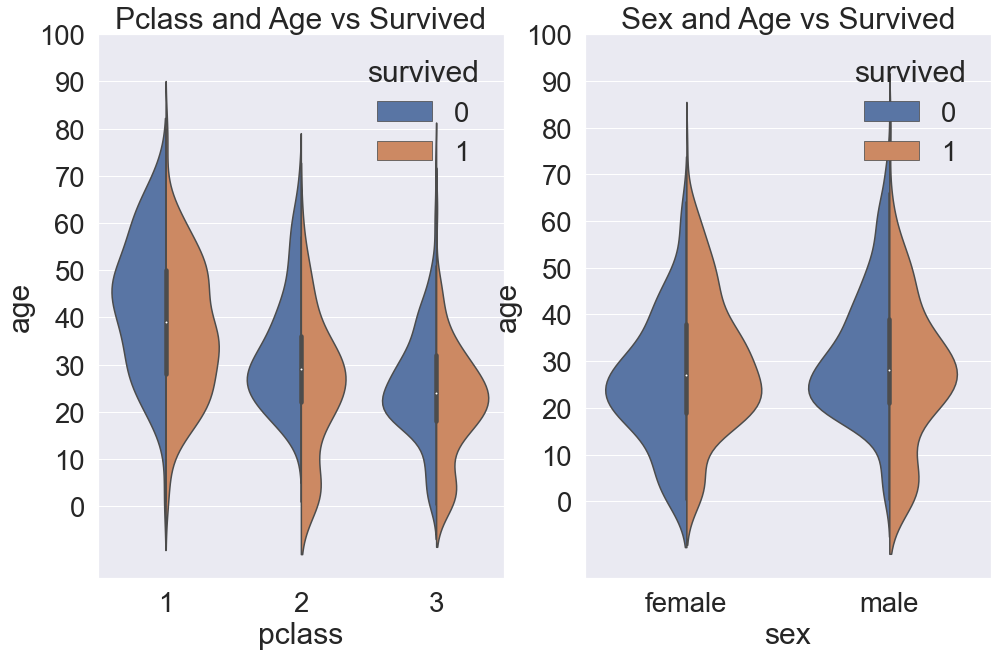

In [21]:
f,ax=plt.subplots(1,2,figsize=(16,10))
sns.violinplot("pclass","age", hue="survived", data=df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("sex","age", hue="survived", data=df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [22]:
# 결측치 채우기
# 이름에 mr가 들어간 사람에게는 남성 평균 나이, mrs가 들어간 사람에게는 여성 평균 나이 부여
df['initial'] = 0
for i in df:
    df['initial'] = df.name.str.extract('([A-Za-z]+)\.')

In [23]:
pd.crosstab(df.initial, df.sex).T.style.background_gradient(cmap='plasma')

initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [24]:
df['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [25]:
df.groupby('initial')['age'].mean()

initial
Dona      39.000000
Master     5.482642
Miss      21.834533
Mr        32.545531
Mrs       37.034884
Other     44.923077
Name: age, dtype: float64

In [26]:
df.loc[(df.age.isnull())&(df.initial=='Mr'),'age']=33
df.loc[(df.age.isnull())&(df.initial=='Mrs'),'age']=36
df.loc[(df.age.isnull())&(df.initial=='Master'),'age']=5
df.loc[(df.age.isnull())&(df.initial=='Miss'),'age']=22
df.loc[(df.age.isnull())&(df.initial=='Other'),'age']=46

In [27]:
# 결측치 없음을 확인
df.age.isna().any()

False

<AxesSubplot:>

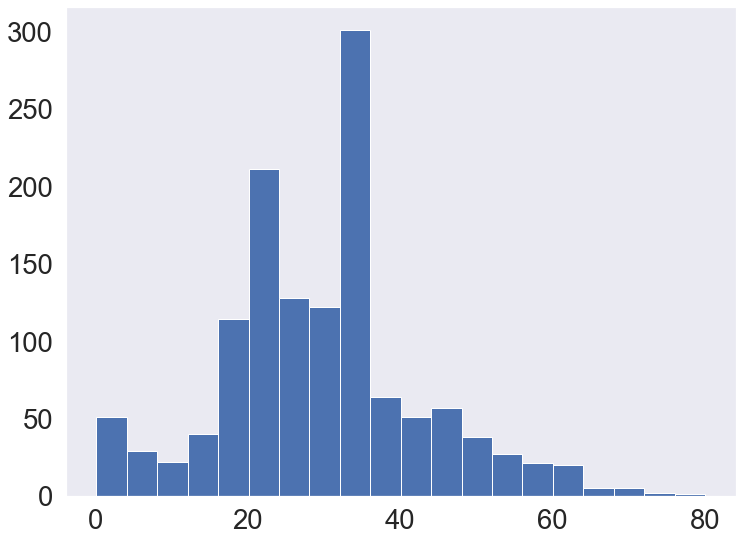

In [28]:
# 전체 탑승자 연령대 시각화
df['age'].hist(bins=20, figsize=(12,9), grid=False)

<AxesSubplot:xlabel='sex', ylabel='survived'>

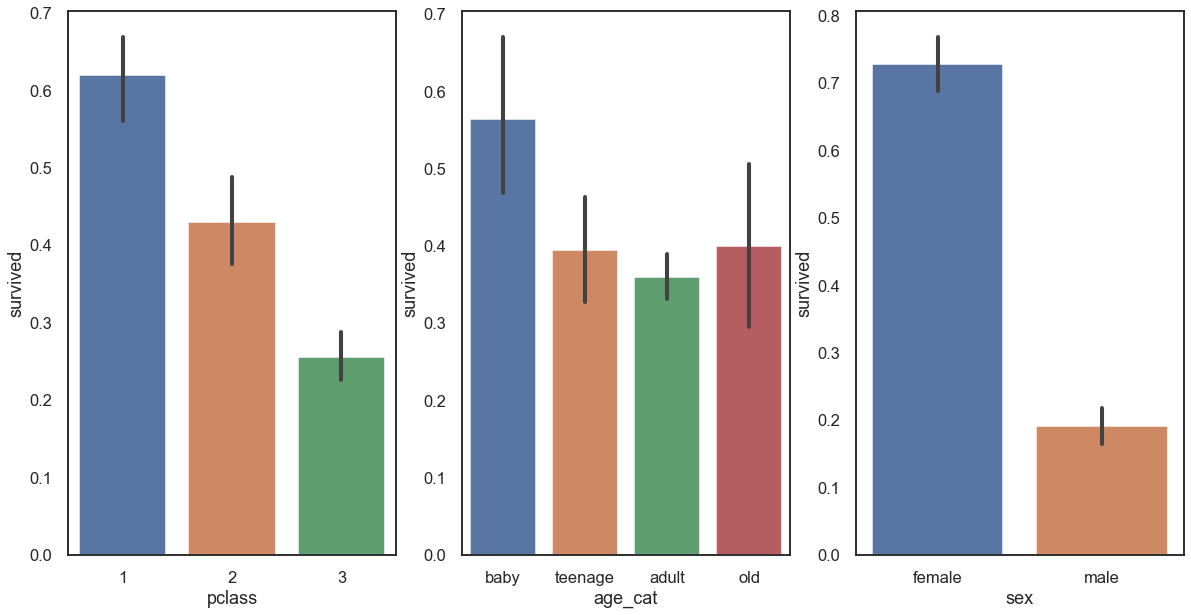

In [67]:
#연령, 성별, 객실등급 한꺼번에
df['age_cat'] = pd.cut(df['age'], bins=[0, 10, 20, 50, 100], 
                             include_lowest=True, labels=['baby', 'teenage', 'adult', 'old'])
fig = plt.figure(figsize=(20,10))
graph1 = fig.add_subplot(1,3,1)
graph2 = fig.add_subplot(1,3,2)
graph3 = fig.add_subplot(1,3,3)

sns.barplot('pclass', 'survived', data=df, ax=graph1)
sns.barplot('age_cat', 'survived', data=df, ax=graph2)
sns.barplot('sex', 'survived', data=df, ax=graph3)

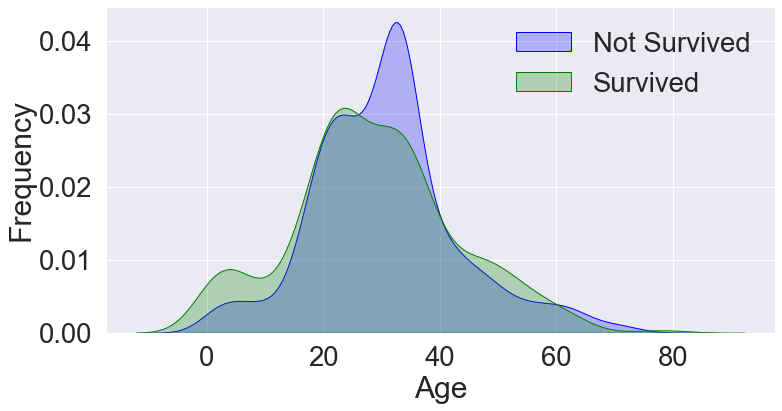

In [30]:
# 연령대별 분포 생존자, 사망자 비교
# method 1. 결측치 채우지 않은 경우 
fig = plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,1,1)
sns.kdeplot(df["age"][(df["survived"] == 0) & (df["age"].notnull())], 
                ax = graph1, color="Blue", shade = True)
sns.kdeplot(df["age"][(df["survived"] == 1) & (df["age"].notnull())], 
                ax =graph1, color="Green", shade= True)
graph1.set_xlabel("Age")
graph1.set_ylabel("Frequency")
graph1.legend(["Not Survived","Survived"])

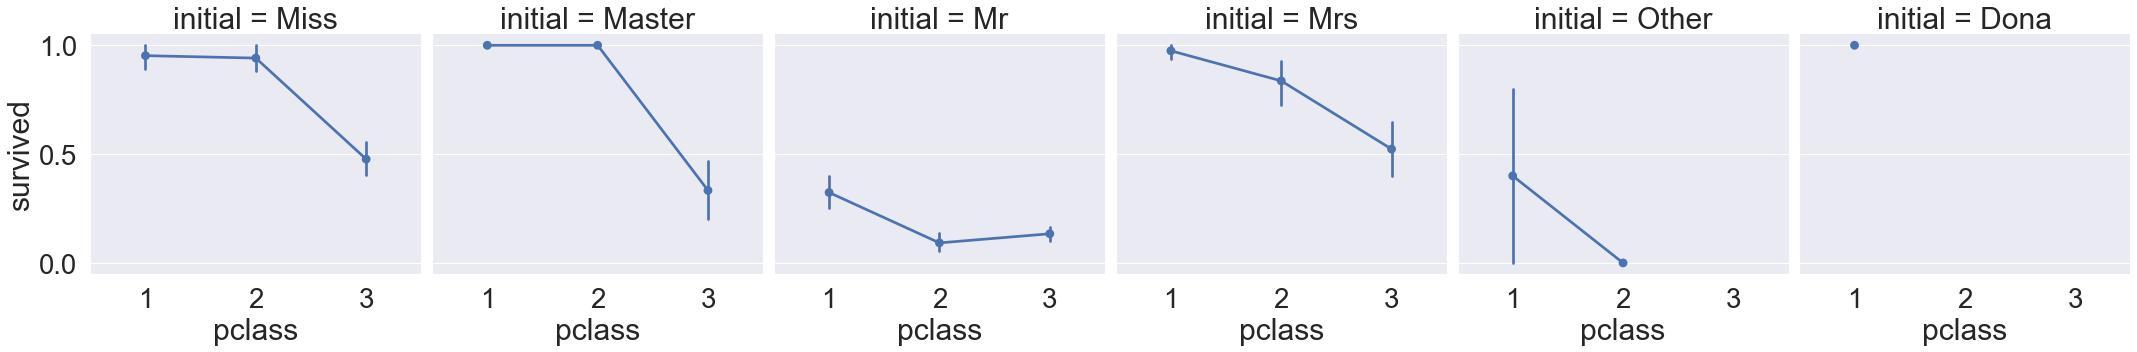

In [31]:
# 위 그래프 : 3~40대에서 가장 많은 사망자가 나왔고, 아이들과 여성의 생존률은 높다
# 아래 그래프까지 여성과 아이들을 우선적으로 구조했음을 보여줌
sns.factorplot('pclass', 'survived', col='initial', data=df)
plt.show()

4. embarked -> categorical feature 

<function matplotlib.pyplot.show(close=None, block=None)>

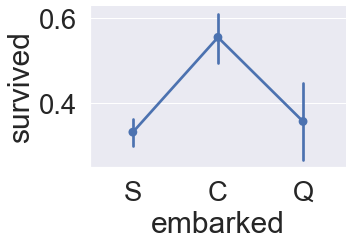

In [32]:
# C 항구에서 탑승한 사람의 생존율 가장 높고
# S 항구에서 탑승한 사람의 생존율 가장 낮다

sns.factorplot('embarked', 'survived', data=df)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show

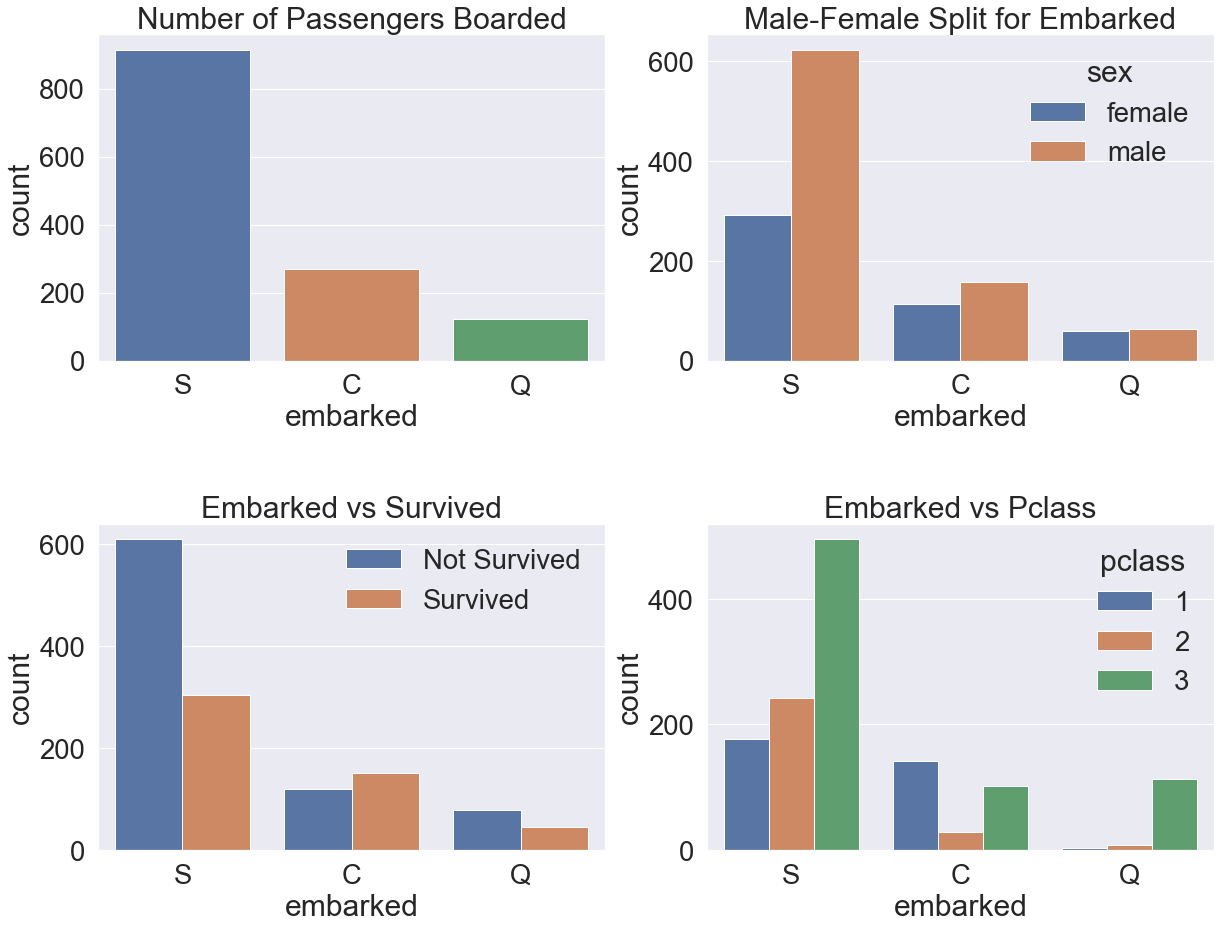

In [33]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('embarked',data=df,ax=ax[0,0])
ax[0,0].set_title('Number of Passengers Boarded')

sns.countplot('embarked',hue='sex',data=df,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('embarked',hue='survived',data=df,ax=ax[1,0])
ax[1,0].legend(['Not Survived', 'Survived'])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('embarked',hue='pclass',data=df,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [34]:
count = df.groupby(['embarked', 'pclass'])['survived'].sum()
mean =  df.groupby(['embarked', 'pclass'])['survived'].mean()
seri_concat = pd.concat([count, mean], axis=1)

In [35]:
seri_concat

survived  survived
embarked pclass                    
C        1             97  0.687943
         2             16  0.571429
         3             37  0.366337
Q        1              2  0.666667
         2              2  0.285714
         3             40  0.353982
S        1             99  0.559322
         2            101  0.417355
         3            104  0.210101

1) S 항구에서 가장 많은 승객이 탑승했고, 그들 중 대부분은 pclass 3  
2) C 항구의 생존률이 가장 높은데, pclass 1 승객이 가장 높은 비율을 차지  
3) Q 항구에서 탑승한 승객의 약 95%는 pclass 3  

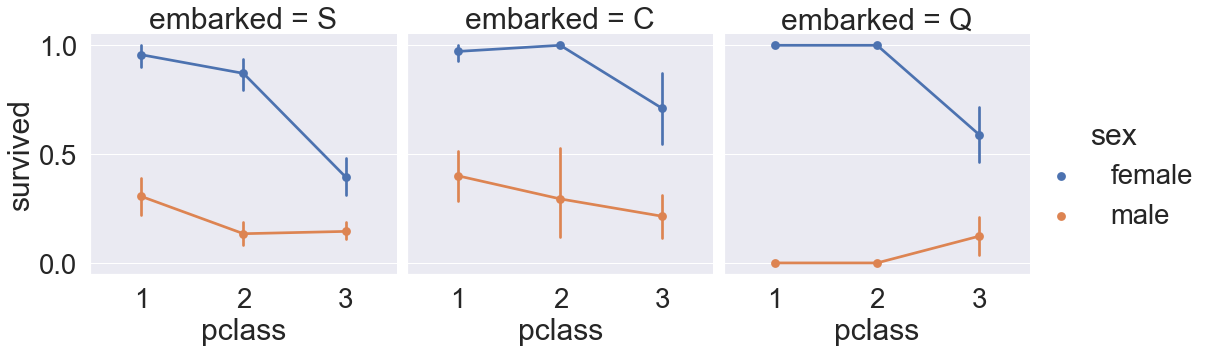

In [36]:
sns.factorplot('pclass', 'survived', hue='sex', col='embarked', data=df)
plt.show()

In [37]:
# 가장 많은 승객들이 항구 S에서 탑승했기 때문에, S로 결측치 채우기
df['embarked'].fillna('S', inplace=True)
df.embarked.isna().any()

False

5. sibsp -> discrete feature
- sibling = brother, sister, stepbrother, stepsister
- spouse = husband, wife

Text(0.5, 1.0, 'SibSp vs Survived')

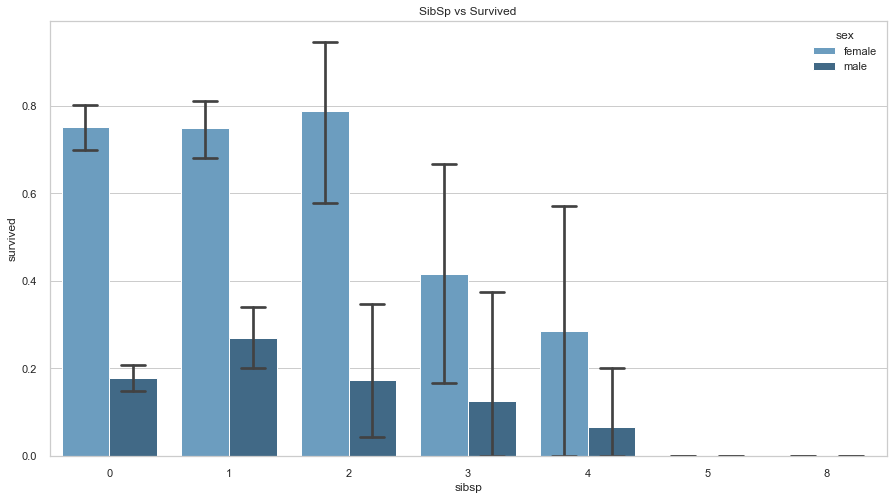

In [29]:
# 형제가 많을수록 생존률 줄어든다
# 형제가 5명~8명인 승객의 생존률은 0%

sns.set_theme(style="whitegrid")
ax = sns.barplot('sibsp','survived', hue = 'sex', data=df, capsize=.2, palette="Blues_d")
ax.set_title('SibSp vs Survived')


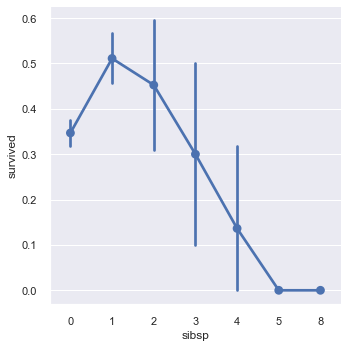

In [23]:
sns.factorplot('sibsp', 'survived', data=df)

In [39]:
# 형제가 5명 이상인 승객의 생존률이 0%인 이유? 모두 pclass3에 해당하는 승객
df[df['sibsp'] >= 5].pclass

825     3
826     3
827     3
828     3
829     3
830     3
1170    3
1171    3
1172    3
1173    3
1174    3
1175    3
1176    3
1177    3
1178    3
Name: pclass, dtype: int64

6. parch

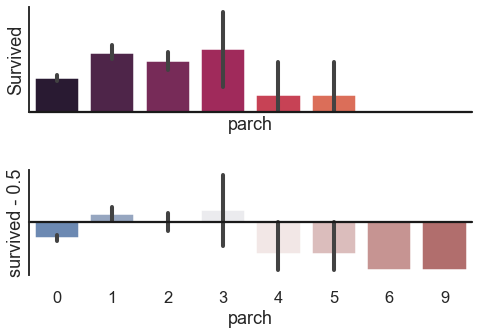

In [40]:
sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = df['parch']
y1 = df['survived']
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Survived")

# Center the data to make it diverging
y2 = y1 - 0.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("survived - 0.5")


# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

Text(0.5, 1.0, 'ParCh vs Survived')

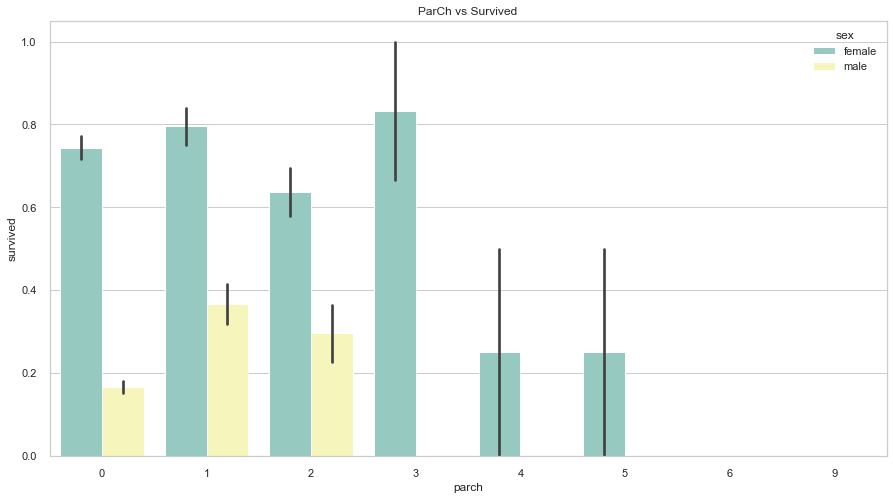

In [33]:
# sibsp, parch 없이 혼자 탑승한 승객의생존률은 낮다
# parch가 1~3명 있는 승객의 생존률이 비교적 높다
# parch가 4명 이상이면 생존률 낮다

sns.set_theme(style="whitegrid")
ax = sns.barplot('parch','survived', hue = 'sex', data=df, ci=68, palette="Set3")
ax.set_title('ParCh vs Survived')

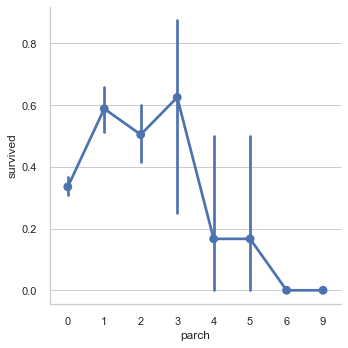

In [31]:
sns.factorplot('parch', 'survived', data=df)

In [62]:
# 부모님과 아이를 5명이상 둔 승객은 모두 pclass 3
pd.crosstab(df.parch, df.pclass).style.background_gradient(cmap='Wistia')

pclass,1,2,3
parch,,,
0,242,206,554
1,50,43,77
2,27,25,61
3,2,3,3
4,2,0,4
5,0,0,6
6,0,0,2
9,0,0,2


In [43]:
# 부모님과 아이를 4명 둔 승객 중
# pclass 1의 생존률은 1/2
# pclass 3의 생존률은 0
df.groupby(['parch', 'pclass'])['survived'].sum()

parch  pclass
0      1         141
       2          64
       3         131
1      1          36
       2          31
       3          33
2      1          21
       2          21
       3          15
3      1           1
       2           3
       3           1
4      1           1
       3           0
5      3           1
6      3           0
9      3           0
Name: survived, dtype: int64

**결론**
- sex : 여성의 생존률 > 남성의 생존률  
- pclass : pclass 1 승객의 생존률 > pclass 3
- age : 5-10세 사이의 유아 생존률이 높다. 15~35세 연령대의 승객 사망률이 높다
- embarked : C 항구에서 탑승한 승객의 생존률이 높다. (C 항구에서 가장 높은 비율로 탑승한 승객은 Pclass 1). Pclass 3 승객은 대부분 S, Q 항구에서 탑승했는데 생존률이 낮다.
- parch + sibsp : sibsp 1~2명, parch 1-3명을 둔 승객의 생존률 > 혼자 탑승했거나 대가족과 함께 탑승한 승객의 생존률 




7. fare -> continuous feature

In [44]:
print('Highest Fare was:', df['fare'].max())
print('Lowest Fare was:', df['fare'].min())
print('Average Fare was:', df['fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 33.29547928134557


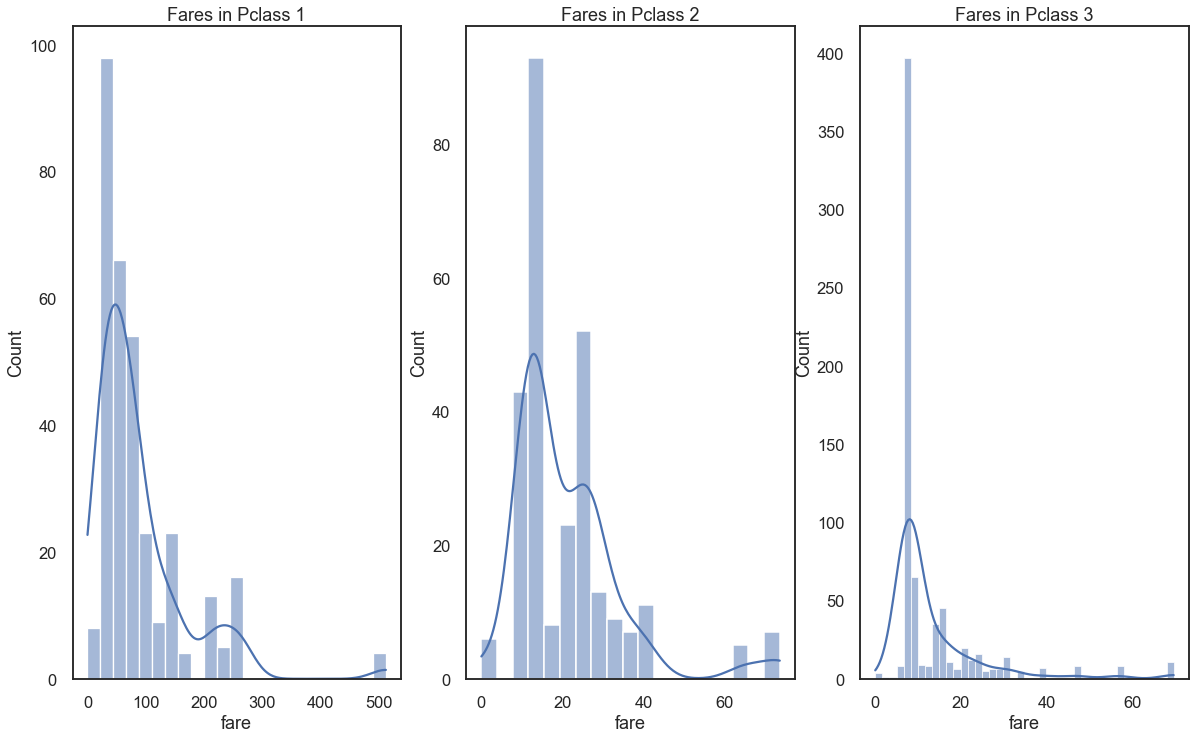

In [45]:
f, ax = plt.subplots(1,3,figsize=(20,12))
for i in range(3):
    sns.histplot(df[df['pclass']==i+1].fare, ax=ax[i], kde=True)
    ax[i].set_title(f'Fares in Pclass {i+1}')

In [46]:
df2 = df.copy()
bins = [0, 50, 200, 400]
labels = ['cheap', 'normal', 'expensive']
df2['fare'] = pd.cut(df['fare'], bins, labels=labels, right=False)

In [47]:
df2.groupby(['fare', 'pclass'])['survived'].mean()

fare       pclass
cheap      1         0.455357
           2         0.437736
           3         0.253991
normal     1         0.710983
           2         0.250000
           3         0.315789
expensive  1         0.647059
           2              NaN
           3              NaN
Name: survived, dtype: float64

In [48]:
sex2 = df2[(df2['fare'] == 'normal') & (df['pclass'] == 2)].sex
survived2 = df2[(df2['fare'] == 'normal') & (df['pclass'] == 2)].survived
seri_concat2 = pd.concat([sex2, survived2], axis=1)

In [49]:
# pclass 2이면서 요금을 50달러~200달러 지불한 승객 중
# 남성은 모두 사망하고, 여성은 모두 생존
seri_concat2

,sex,survived
386,male,0
390,male,0
394,male,0
437,female,1
438,female,1
439,male,0
440,female,1
442,male,0
443,male,0
444,male,0


In [52]:
sex2_ch = df2[(df2['fare'] == 'cheap') & (df['pclass'] == 2)].sex
survived2_ch = df2[(df2['fare'] == 'cheap') & (df['pclass'] == 2)].survived
seri_concat2_ch = pd.concat([sex2_ch, survived2_ch], axis=1)
seri_concat2_ch.groupby('sex')['survived'].mean()

sex
female    0.883495
male      0.154321
Name: survived, dtype: float64

In [68]:
# pclass 2의 경우 요금과 관계없이 남성의 생존률은 현저히 낮고, 여성의 생존률은 높다
seri_concat2_ch.value_counts()

sex     survived
male    0           137
female  1            91
male    1            25
female  0            12
dtype: int64

In [55]:
sex1 = df2[(df2['fare'] == 'cheap') & (df['pclass'] == 1)].sex
survived1 = df2[(df2['fare'] == 'cheap') & (df['pclass'] == 1)].survived
seri_concat1 = pd.concat([sex1, survived1], axis=1)
seri_concat1

,sex,survived
5,male,1
7,male,0
9,male,0
14,male,1
15,male,0
...,...,...
305,male,0
315,female,1
318,male,0
320,male,1


In [56]:
# pclass 1 이더라도 요금을 50달러 미만으로 지불한 승객 중
# 여성의 생존률은 90%를 넘는다
seri_concat1.groupby('sex')['survived'].mean()

sex
female    0.909091
male      0.344444
Name: survived, dtype: float64

In [57]:
sex3 = df2[(df2['fare'] == 'normal') & (df['pclass'] == 3)].sex
survived3 = df2[(df2['fare'] == 'normal') & (df['pclass'] == 3)].survived
seri_concat3 = pd.concat([sex3, survived3], axis=1)
seri_concat3.groupby('sex')['survived'].mean()

sex
female    0.000000
male      0.428571
Name: survived, dtype: float64

In [58]:
# pclass 3이더라도 요금을 50달러 이상 지불한 승객 중
# 여성은 모두 사망하고, 남성의 생존률도 높지 않다.
sex3

674       male
714       male
805       male
858       male
945       male
946       male
949       male
972       male
1170      male
1171      male
1172    female
1173    female
1174    female
1175    female
1176      male
1177      male
1178      male
1179      male
1180    female
Name: sex, dtype: object

In [59]:
# pclass 1이면서 요금을 200~400 달러 지불한 승객의 생존률은 성별에 관계없이 높다.
sex1_exp = df2[(df2['fare'] == 'expensive') & (df['pclass'] == 1)].sex
survived1_exp = df2[(df2['fare'] == 'expensive') & (df['pclass'] == 1)].survived
seri_concat1_exp = pd.concat([sex1_exp, survived1_exp], axis=1)
seri_concat1_exp.groupby('sex')['survived'].mean()

sex
female    0.954545
male      0.083333
Name: survived, dtype: float64

**나만의 가설**  
요금과 관계없이 구조 작업은 pclass 1 승객부터 이루어진 것 같다.  
(단, pclass 1 중에서도 가장 요금을 많이 낸 집단의 경우 성별과 관계없이 우선적으로 구명보트에 오를 수 있었다.)  
그 결과, 50달러 이상 지불했음에도 pclass 3에 탑승했던 승객의 생존률은 낮게 나타난다.  

**특이점 : pclass 2**  
pclass 2이면서 요금을 50달러 이상 지불한 남성은 모두 사망, 여성은 모두 생존  
pclass 2의 경우, 남성의 생존률이 현저히 낮고, 여성의 생존률은 높은 편이다.